In [1]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [8]:

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


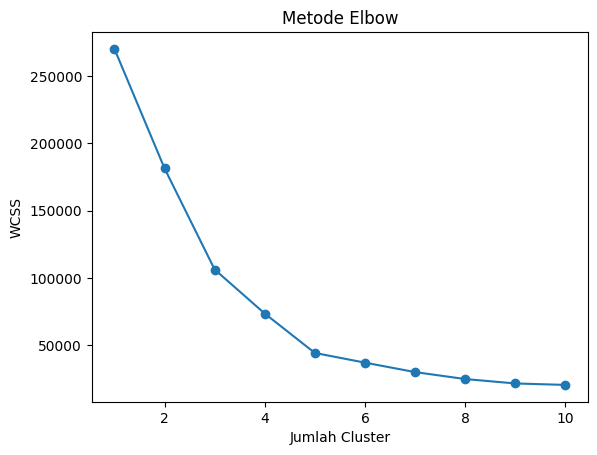

In [9]:
# Menggunakan metode elbow untuk menemukan jumlah cluster yang optimal

from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot grafik untuk memvisualisasikan Metode Elbow untuk menemukan jumlah cluster yang optimal
# WCSS is the sum of squared distance between each point and the centroiud in a cluster
# WCSS adalah jumlah kaudrat antara setiap titik dan pusat massa dalam sebuah cluster
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

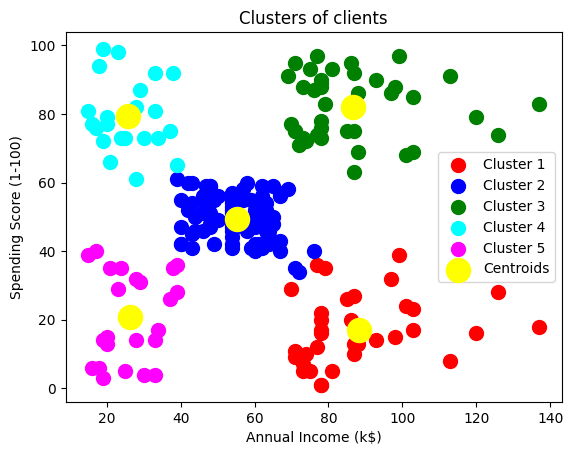

In [12]:

# Menerapkan KMeans ke dataset dengan jumlah cluster optimal

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi cluster

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting centroids dari cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()